In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/adity/Downloads/SBI_Historical_Data.csv")

In [3]:
# Dimensions of Dataset

df.shape

(1385, 7)

In [5]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [6]:
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1380,"Jan 07, 2015",300.15,300.00,302.55,295.15,15.05M,0.08%
1381,"Jan 06, 2015",299.90,310.00,311.10,298.70,15.33M,-4.11%
1382,"Jan 05, 2015",312.75,316.25,316.80,312.10,9.14M,-0.79%
1383,"Jan 02, 2015",315.25,314.35,318.30,314.35,9.94M,0.40%
1384,"Jan 01, 2015",314.00,312.45,315.00,310.70,6.14M,0.69%


In [8]:
# Statistical Summary

df.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [9]:
# Converting Date

df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# Check Data Type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1385 non-null   datetime64[ns]
 1   Price     1385 non-null   float64       
 2   Open      1385 non-null   float64       
 3   High      1385 non-null   float64       
 4   Low       1385 non-null   float64       
 5   Vol.      1385 non-null   object        
 6   Change %  1385 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 75.9+ KB


In [13]:
# Missing Values


def missing_data(df):
    total = df.isnull().sum()
    percent = total/df.isnull().count()*100
    missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        dtype = str(df[col].dtype)
        types.append(dtype)
    missing_values['Types'] = types
    missing_values.sort_values('Total',ascending=False,inplace=True)
    return(np.transpose(missing_values))
missing_data(df)


,Date,Price,Open,High,Low,Vol.,Change %
Total,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0
Types,datetime64[ns],float64,float64,float64,float64,object,object


In [16]:
df = df.groupby('Date')['Price'].sum().reset_index()

In [17]:
# Index the dataset with Date

df = df.set_index('Date')
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-05', '2015-01-06',
               '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-12',
               '2015-01-13', '2015-01-14',
               ...
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', name='Date', length=1385, freq=None)

In [18]:
y = df['Price'].resample('MS').mean()

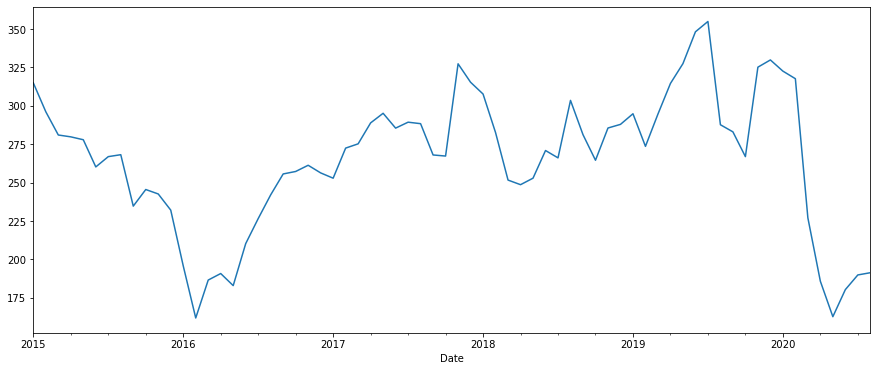

In [19]:
# Visualize time series data

y.plot(figsize=(15, 6))
plt.show()

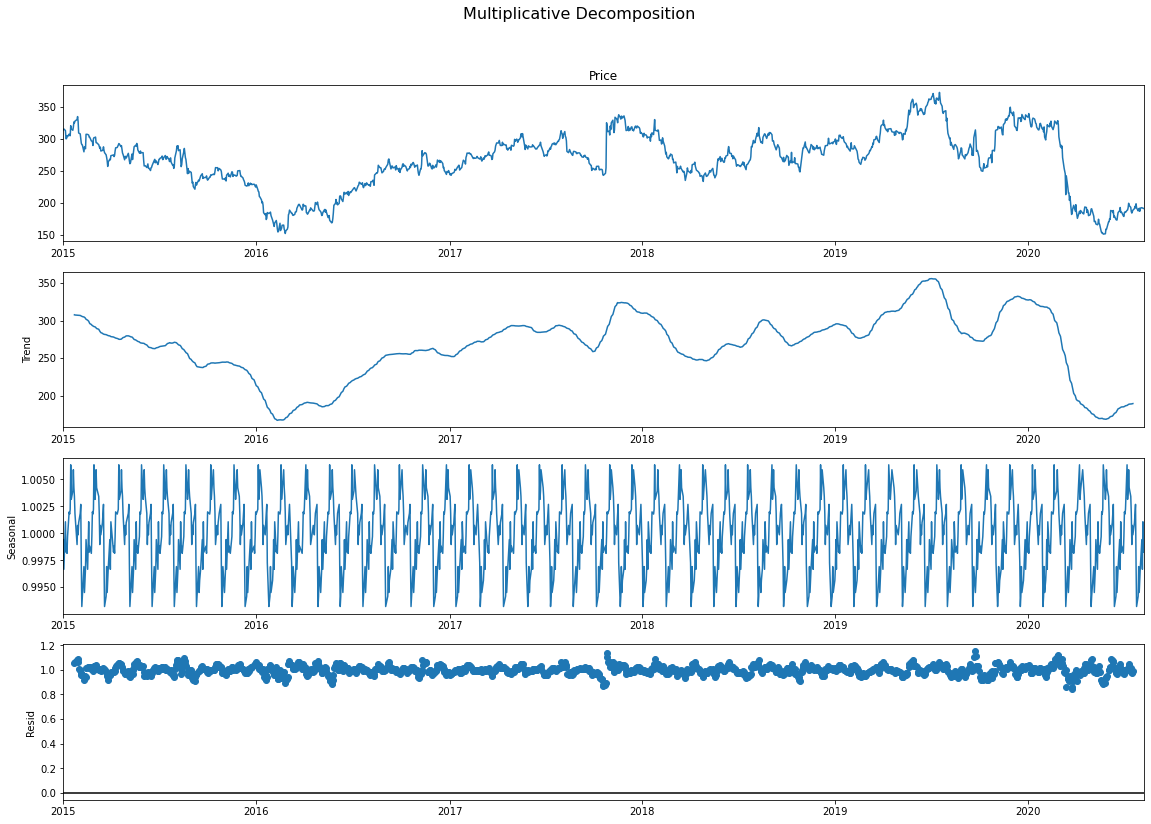

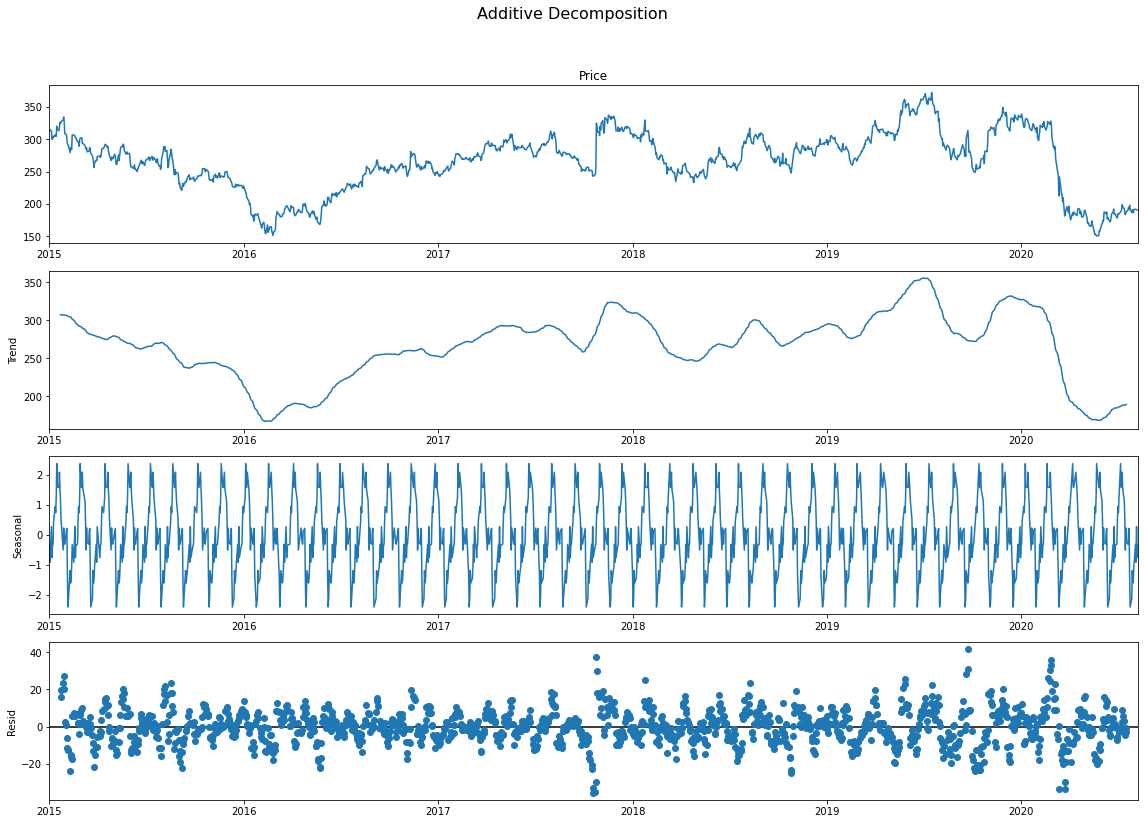

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['Price'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['Price'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


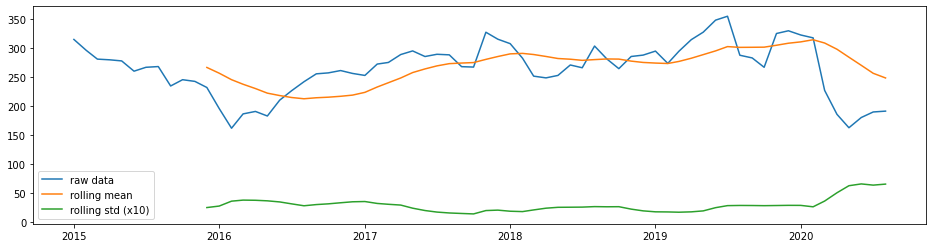

In [21]:
# Check Stationarity graphically


def test_stationarity(timeseries, title):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()
pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y,'raw data')

In [24]:
# Augmented Dickey-Fuller Test


from statsmodels.tsa.stattools import adfuller

#  null hypothesis in ADF test is the series is not stationary.
#alpha=0.05
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))
ADF_test(y,'raw data')



 > Is the raw data stationary ?
Test statistic = -2.460
P-value = 0.125
Critical values :
	1%: -3.5335601309235605 - The data is not stationary with 99% confidence
	5%: -2.9064436883991434 - The data is not stationary with 95% confidence
	10%: -2.590723948576676 - The data is not stationary with 90% confidence


A major difference between KPSS and ADF tests is the capability of the KPSS test to check for stationarity in the ‘presence of a deterministic trend’.

In [26]:
# KPSS test


#alpha=0.05
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(y)



# if a series is stationary according to the KPSS test by setting regression='ct' and is not stationary according to the ADF test, it means the series is stationary around a deterministic trend and so is fairly easy to model this series and produce fairly accurate forecasts.

KPSS Statistic: 0.14173669179466153
p-value: 0.1
num lags: 11
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\adity\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


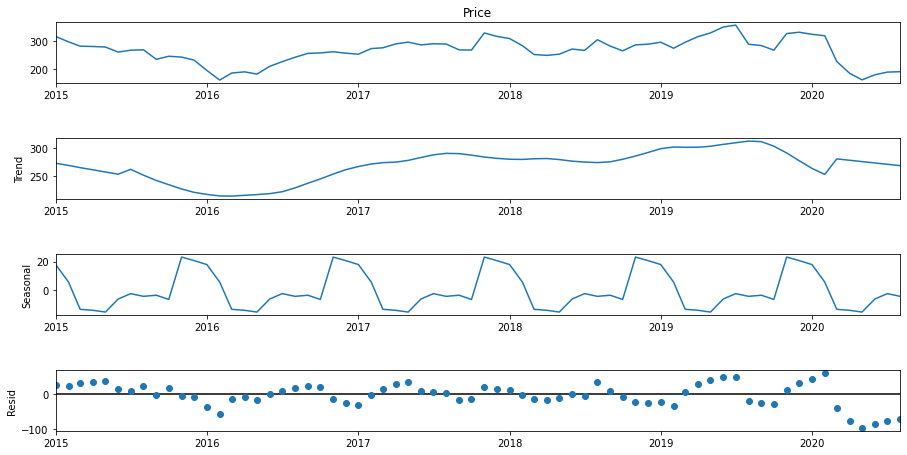

In [27]:
# Perform decomposing
# using additive because there is no pattern in residual

import statsmodels.api as sm

# graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
seasonal_decompose(y)

Parameter Selection using gridsearch

In [64]:
import warnings
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [65]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:941.4367646096889
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:729.7858682118058
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:625.7758813165192
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:470.61399413797676
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:639.4255490546277
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:606.2533129033409
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:476.37158727197317
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:468.13878617083054
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:844.4320313658701
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:654.2905848927901
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:565.7568050620653
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:429.089477972033
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:591.8264312694514
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:553.5380265170446
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:444.5333340496032
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:426.4580409289889
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:607.4127574398146
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:502.90186473596793
ARIMA(0

Fit ARIMA model as per the selected optimum value of parameters

In [70]:
# ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:388.1843462831602 is the least AIC score

mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0153      0.173      0.089      0.929      -0.323       0.354
ar.S.L12      -0.7236      0.173     -4.176      0.000      -1.063      -0.384
ma.S.L12      -0.2610      0.295     -0.885      0.376      -0.839       0.317
sigma2       612.5815    128.930      4.751      0.000     359.883     865.280


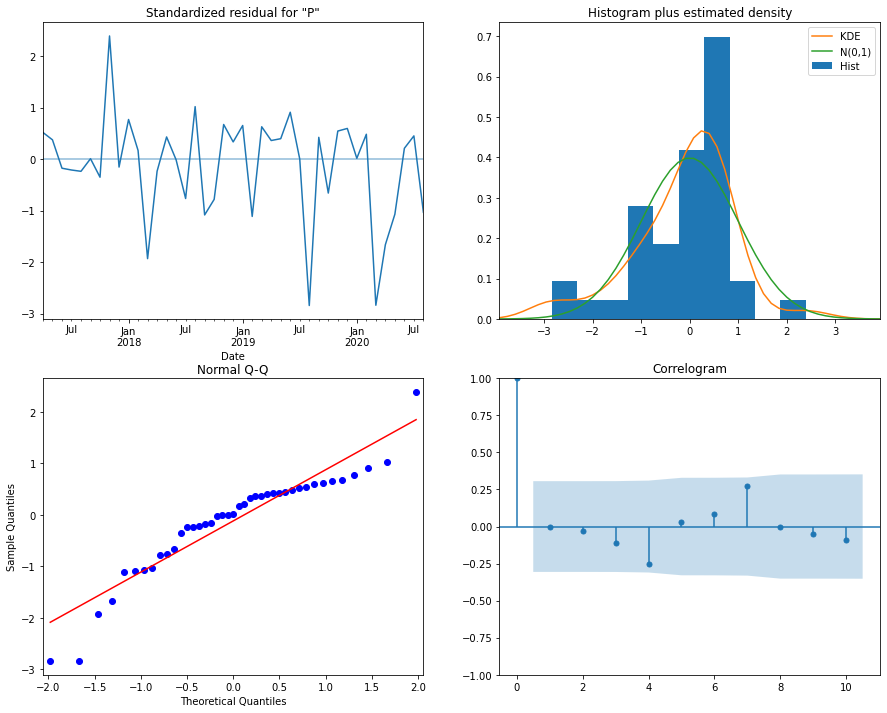

In [71]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [73]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()

Validating Forecasts

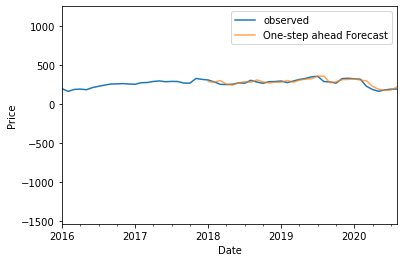

In [81]:
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

Calculate the MSE and RMSE

In [78]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 663.68


In [79]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 25.76


Visualize the forecast

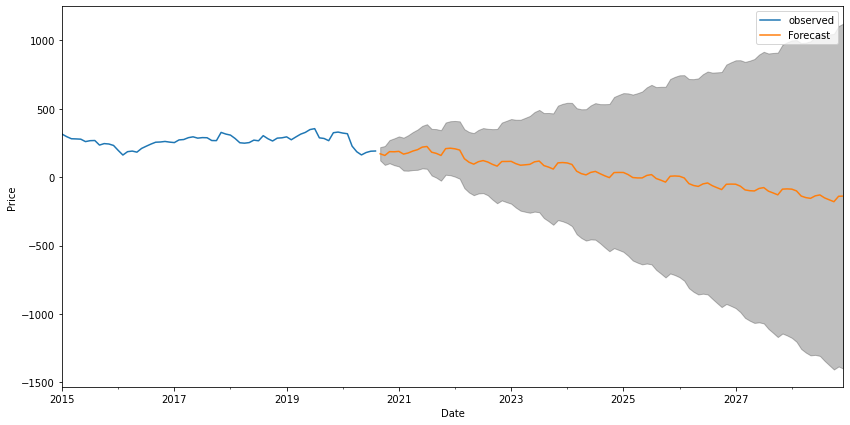

In [83]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()